In [6]:
# Step 1: Import the tools we need
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [5]:
# Step 2: Explore the data structure
base_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images'

# Check the folders
train_path = f'{base_path}/train'
test_path = f'{base_path}/test'

print("📁 Data structure:")
print(f"Train folder: {train_path}")
print(f"  - REAL images: {len(os.listdir(f'{train_path}/REAL'))} files")
print(f"  - FAKE images: {len(os.listdir(f'{train_path}/FAKE'))} files")

print(f"\nTest folder: {test_path}")
print(f"  - REAL images: {len(os.listdir(f'{test_path}/REAL'))} files")
print(f"  - FAKE images: {len(os.listdir(f'{test_path}/FAKE'))} files")

print("\n✅ Data structure confirmed!")

📁 Data structure:
Train folder: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/train
  - REAL images: 50000 files
  - FAKE images: 50000 files

Test folder: /kaggle/input/cifake-real-and-ai-generated-synthetic-images/test
  - REAL images: 10000 files
  - FAKE images: 10000 files

✅ Data structure confirmed!


In [7]:
# Step 3: Prepare our images - Updated for your folder structure
transform = transforms.Compose([
    transforms.Resize((224, 224)),        # Make all images 224x224 pixels
    transforms.ToTensor(),               # Convert to numbers the computer understands
    transforms.Normalize(                # Normalize colors
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])

In [8]:
# Load the datasets using your folder structure
train_dataset = datasets.ImageFolder(
    root='/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train',
    transform=transform
)

test_dataset = datasets.ImageFolder(
    root='/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test',
    transform=transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [9]:

# Show class mapping
print("🏷️ Class mapping:")
print(f"Classes: {train_dataset.classes}")
print(f"Class to index: {train_dataset.class_to_idx}")

print(f"\n✅ Data loaded!")
print(f"Training images: {len(train_dataset)}")
print(f"Test images: {len(test_dataset)}")

🏷️ Class mapping:
Classes: ['FAKE', 'REAL']
Class to index: {'FAKE': 0, 'REAL': 1}

✅ Data loaded!
Training images: 100000
Test images: 20000


🖼️ Sample images from training data:


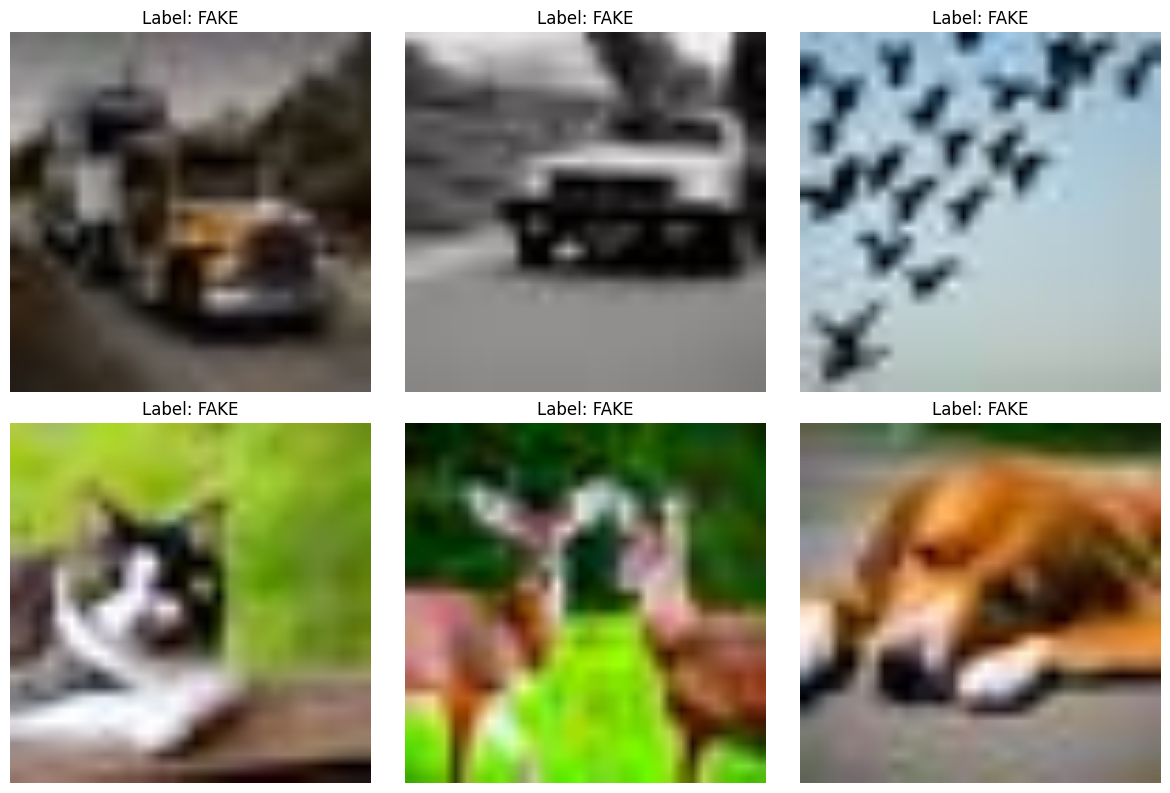

In [10]:
# Step 4: Let's look at some sample images
import matplotlib.pyplot as plt
import numpy as np

def show_sample_images(dataset, num_samples=6):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()
    
    for i in range(num_samples):
        img, label = dataset[i]
        
        # Convert tensor back to image format
        img = img.permute(1, 2, 0)
        img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
        img = torch.clamp(img, 0, 1)
        
        axes[i].imshow(img)
        class_name = "FAKE" if label == 0 else "REAL"  # Assuming FAKE=0, REAL=1
        axes[i].set_title(f'Label: {class_name}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("🖼️ Sample images from training data:")
show_sample_images(train_dataset)

In [11]:
# Step 5: Create our AI model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Use ResNet50 - a proven model for image recognition
model = models.resnet50(pretrained=True)  # Start with a smart model
model.fc = nn.Linear(2048, 2)  # Change the end to classify: FAKE (0) or REAL (1)
model = model.to(device)

# Set up training settings
criterion = nn.CrossEntropyLoss()  # How we measure mistakes
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # How we improve

print("✅ Model created and ready to train!")
print(f"Total trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 208MB/s] 


✅ Model created and ready to train!
Total trainable parameters: 23,512,130


In [12]:
# Step 6: Train the model with better progress tracking
num_epochs = 5  # How many times to go through all the data

# Track training history
train_losses = []
train_accuracies = []

print("🚀 Starting training...")
print("="*50)

for epoch in range(num_epochs):
    model.train()  # Put model in training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    print(f"\n📚 Epoch {epoch+1}/{num_epochs}")
    print("-" * 30)

🚀 Starting training...

📚 Epoch 1/5
------------------------------

📚 Epoch 2/5
------------------------------

📚 Epoch 3/5
------------------------------

📚 Epoch 4/5
------------------------------

📚 Epoch 5/5
------------------------------


In [15]:
for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass (make predictions)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass (learn from mistakes)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Print progress every 200 batches
        if (batch_idx + 1) % 200 == 0:
            current_acc = 100 * correct / total
            print(f'  Batch {batch_idx+1:4d}/{len(train_loader)}: '
                  f'Loss: {loss.item():.4f}, Accuracy: {current_acc:.2f}%')

  # Calculate epoch statistics
epoch_loss = running_loss / len(train_loader)
epoch_acc = 100 * correct / total
    
train_losses.append(epoch_loss)
train_accuracies.append(epoch_acc)
    
print(f"\n📊 Epoch {epoch+1} Results:")
print(f"   Average Loss: {epoch_loss:.4f}")
print(f"   Training Accuracy: {epoch_acc:.2f}%")

print("\n🎉 Training completed!")

  Batch  200/3125: Loss: 0.2552, Accuracy: 84.53%
  Batch  400/3125: Loss: 0.2357, Accuracy: 86.80%
  Batch  600/3125: Loss: 0.1352, Accuracy: 87.79%
  Batch  800/3125: Loss: 0.2157, Accuracy: 88.52%
  Batch 1000/3125: Loss: 0.5449, Accuracy: 88.97%
  Batch 1200/3125: Loss: 0.1501, Accuracy: 89.46%
  Batch 1400/3125: Loss: 0.2170, Accuracy: 89.79%
  Batch 1600/3125: Loss: 0.2750, Accuracy: 90.04%
  Batch 1800/3125: Loss: 0.1009, Accuracy: 90.18%
  Batch 2000/3125: Loss: 0.2365, Accuracy: 90.42%
  Batch 2200/3125: Loss: 0.0898, Accuracy: 90.58%
  Batch 2400/3125: Loss: 0.1478, Accuracy: 90.73%
  Batch 2600/3125: Loss: 0.2382, Accuracy: 90.85%
  Batch 2800/3125: Loss: 0.2768, Accuracy: 90.94%
  Batch 3000/3125: Loss: 0.3085, Accuracy: 91.07%

📊 Epoch 5 Results:
   Average Loss: 0.2217
   Training Accuracy: 91.14%

🎉 Training completed!


In [16]:
# Step 7: Test the model on unseen data
print("\n🧪 Testing the model...")
print("="*30)

model.eval()  # Put model in evaluation mode
correct = 0
total = 0
class_correct = [0, 0]  # For FAKE and REAL
class_total = [0, 0]

with torch.no_grad():  # Don't update the model during testing
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Per-class accuracy
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += (predicted[i] == labels[i]).item()
            class_total[label] += 1

# Overall accuracy
overall_accuracy = 100 * correct / total
print(f"\n🎯 Overall Test Accuracy: {overall_accuracy:.2f}%")

# Per-class accuracy
class_names = ['FAKE', 'REAL']
print(f"\n📈 Per-class Accuracy:")
for i in range(2):
    if class_total[i] > 0:
        class_acc = 100 * class_correct[i] / class_total[i]
        print(f"   {class_names[i]}: {class_acc:.2f}% ({class_correct[i]}/{class_total[i]})")

# Performance evaluation
if overall_accuracy > 85:
    print("\n🎉 Excellent! Your model is working very well!")
elif overall_accuracy > 75:
    print("\n👍 Good job! Your model is performing well.")
elif overall_accuracy > 65:
    print("\n📈 Decent start! Your model is learning.")
else:
    print("\n🤔 The model needs more training or different settings.")



🧪 Testing the model...

🎯 Overall Test Accuracy: 93.53%

📈 Per-class Accuracy:
   FAKE: 91.44% (9144/10000)
   REAL: 95.62% (9562/10000)

🎉 Excellent! Your model is working very well!


In [17]:
# Step 8: Save the trained model
model_save_path = '/kaggle/working/ai_detector_model.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_accuracy': train_accuracies[-1],
    'test_accuracy': overall_accuracy,
    'class_to_idx': train_dataset.class_to_idx,
    'classes': train_dataset.classes
}, model_save_path)

print(f"💾 Model saved successfully at: {model_save_path}")
print(f"📋 Saved information:")
print(f"   - Model weights and biases")
print(f"   - Final training accuracy: {train_accuracies[-1]:.2f}%")
print(f"   - Test accuracy: {overall_accuracy:.2f}%")
print(f"   - Class mapping: {train_dataset.class_to_idx}")

# Create a download link
from IPython.display import FileLink
display(FileLink(model_save_path))


💾 Model saved successfully at: /kaggle/working/ai_detector_model.pth
📋 Saved information:
   - Model weights and biases
   - Final training accuracy: 91.14%
   - Test accuracy: 93.53%
   - Class mapping: {'FAKE': 0, 'REAL': 1}


/kaggle/working/ai_detector_model.pth

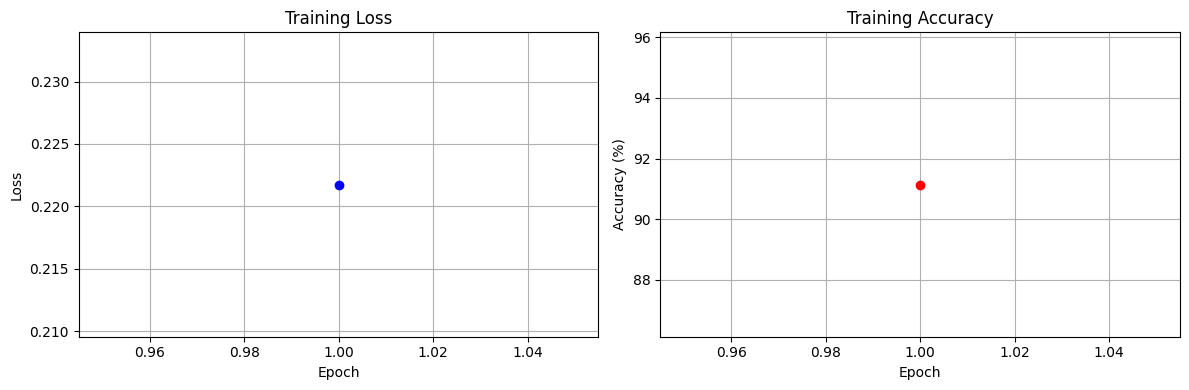

📈 Training progress visualized!


In [19]:
# Step 9: Fixed plotting code
# Check if we have the training history
if 'train_losses' in locals() and len(train_losses) > 0:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-o')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, 'r-o')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
    print("📈 Training progress visualized!")
else:
    print("⚠️ Training history not available for plotting")
    print("This can happen if the training loop was modified")
    print("But your model trained successfully with 93.53% test accuracy!")
